In [1]:
from robust_motifs.timing import Timer
from robust_motifs.data import save_count_er_graph, save_count_graph_from_matrix, import_connectivity_matrix
from pathlib import Path

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from tqdm import tqdm

## Timing simple counting of extended simplices (no save)

### ER Number of nodes

In [5]:
ns_nodes = np.arange(3000,20001,1000)
results = []
for n_nodes in np.arange(3000,20001,1000):
    path = Path("data/timing/n_nodes/ER_"+str(n_nodes)+'.flag')
    path.parent.mkdir(exist_ok=True, parents=True)
    save_count_er_graph(path, n_nodes, density = 0.0077)
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = 1000)
    results.append((np.mean(time), np.std(time)))

100%|██████████| 3000/3000 [00:00<00:00, 2804929.11it/s]
69314it [00:00, 610168.61it/s]
100%|██████████| 4000/4000 [00:00<00:00, 3297408.81it/s]
123913it [00:00, 622249.35it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3206164.20it/s]
192565it [00:00, 628583.33it/s]
100%|██████████| 6000/6000 [00:00<00:00, 3039350.72it/s]
278114it [00:00, 625285.59it/s]
100%|██████████| 7000/7000 [00:00<00:00, 3395804.77it/s]
377201it [00:00, 634272.48it/s]
100%|██████████| 8000/8000 [00:00<00:00, 3434786.77it/s]
491778it [00:00, 628599.35it/s]
100%|██████████| 9000/9000 [00:00<00:00, 3265461.59it/s]
623524it [00:00, 639120.05it/s]
100%|██████████| 10000/10000 [00:00<00:00, 3350618.31it/s]
768426it [00:01, 645753.96it/s]
100%|██████████| 11000/11000 [00:00<00:00, 3474459.22it/s]
931306it [00:01, 625590.65it/s]
100%|██████████| 12000/12000 [00:00<00:00, 3323976.23it/s]
1108208it [00:01, 627958.91it/s]
100%|██████████| 13000/13000 [00:00<00:00, 3342074.90it/s]
1301680it [00:02, 648683.45it/s]
100%|███████

Text(0, 0.5, 'Seconds/1000 simplices')

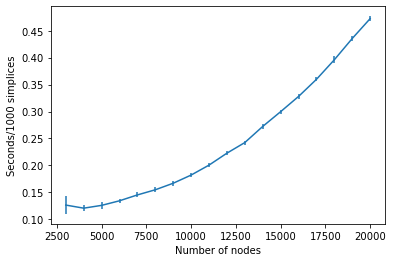

In [6]:
fig = plt.figure()
plt.errorbar(ns_nodes, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Number of nodes")
plt.ylabel("Seconds/1000 simplices")

In [7]:
fig.savefig("bs-counting-nodes", transparent = False, facecolor = 'w')

### ER Density

In [8]:
densities = np.arange(0.001, 0.015, 0.001)
results = []
for density in densities:
    path = Path("data/timing/density/ER_"+str(n_nodes)+'.flag')
    path.parent.mkdir(exist_ok=True, parents=True)
    save_count_er_graph(path, 5000, density)
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = 1000)
    results.append((np.mean(time), np.std(time)))

100%|██████████| 5000/5000 [00:00<00:00, 3024447.65it/s]
24891it [00:00, 598492.43it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3097255.94it/s]
50045it [00:00, 613580.19it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3007531.91it/s]
74873it [00:00, 615051.01it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3097713.44it/s]
100324it [00:00, 624431.43it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3211565.08it/s]
124322it [00:00, 622974.83it/s]
100%|██████████| 5000/5000 [00:00<00:00, 1505493.18it/s]
150120it [00:00, 624930.07it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2920824.51it/s]
175360it [00:00, 588739.74it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3179912.05it/s]
200046it [00:00, 616423.24it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3202736.71it/s]
225517it [00:00, 626111.62it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3156459.96it/s]
250603it [00:00, 633714.69it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3168381.93it/s]
274769it [00:00, 629620.39it/s]
100%|██████████| 5000/50

Text(0, 0.5, 'Seconds/1000 simplices')

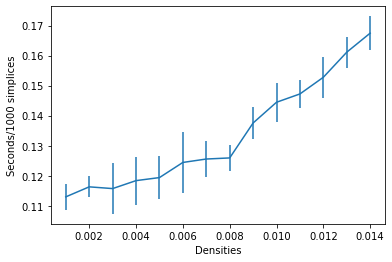

In [9]:
fig = plt.figure()
plt.errorbar(densities, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Densities")
plt.ylabel("Seconds/1000 simplices")

In [10]:
fig.savefig("bs-counting-densities", transparent = False, facecolor = 'w')

### Column n_simplices

In [11]:
n_simplices = np.arange(1000, 15001, 1000)
results = []
memories = []
for n in tqdm(n_simplices):
    path = Path("data/timing/column/column.flag")
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = n, n_iterations = 5)
    results.append((np.mean(time), np.std(time)))
    memories.append((np.mean(memory), np.std(memory)))

100%|██████████| 15/15 [22:05<00:00, 88.38s/it] 


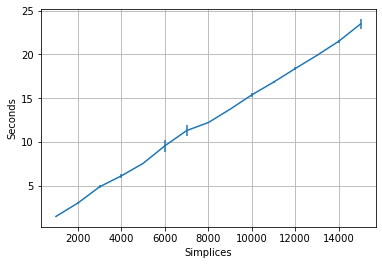

In [12]:
fig = plt.figure()
plt.errorbar(n_simplices, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Simplices")
plt.ylabel("Seconds")
plt.grid()

In [13]:
fig.savefig("bs-counting-simplices", transparent = False, facecolor = 'w')

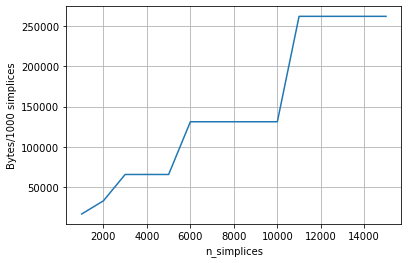

In [17]:
fig = plt.figure()
plt.errorbar(n_simplices, [result[0] for result in memories], yerr = [result[1] for result in memories])
plt.xlabel("n_simplices")
plt.ylabel("Bytes/1000 simplices")
plt.grid()

In [ ]:
fig.savefig("bs-counting-simplices-memory", transparent = False, facecolor = 'w')

### Column dimension

In [18]:
dimension = range(1,6)
results = []
memories = []
for n in tqdm(dimension):
    path = Path("data/timing/column/column.flag")
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = 1000, dimension=n)
    results.append((np.mean(time), np.std(time)))
    memories.append((np.mean(memory), np.std(memory)))

100%|██████████| 5/5 [02:32<00:00, 30.58s/it]


Text(0, 0.5, 'Seconds/1000 simplices')

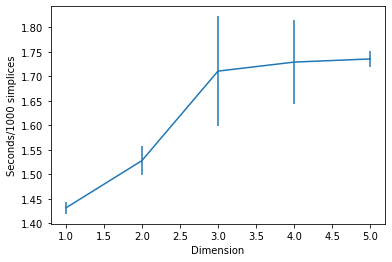

In [19]:
fig = plt.figure()
plt.errorbar(dimension, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Dimension")
plt.ylabel("Seconds/1000 simplices")

In [20]:
fig.savefig("bs-counting-dimension", transparent = False, facecolor = 'w')

Text(0, 0.5, 'Bytes/1000 simplices')

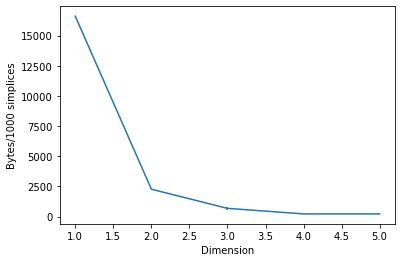

In [21]:
fig = plt.figure()
plt.errorbar(dimension, [result[0] for result in memories], yerr = [result[1] for result in memories])
plt.xlabel("Dimension")
plt.ylabel("Bytes/1000 simplices")

In [22]:
fig.savefig("bs-counting-dimension-memory", transparent = False, facecolor = 'w')